In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

In [64]:
df = pd.read_csv('dataCircle.txt', sep='\s+', names=['x', 'y', 'label'])

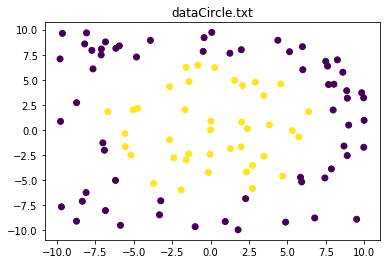

In [65]:
plt.scatter(df.x, df.y, c=df.label);
plt.title('dataCircle.txt');

In [113]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=15)
bdt.fit(df[['x', 'y']].values, df.label);
score = bdt.score(df[['x', 'y']].values, df.label)
print '{0:0.1f}% classification'.format(100*score)

98.0% classification


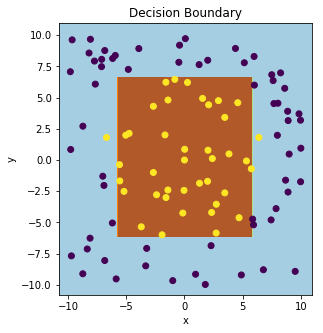

In [115]:
plot_step = .025
class_names = "AB"

plt.figure(figsize=(10, 5))
plt.subplot(121)

x_min, x_max = df.x.min() - 1, df.x.max() + 1
y_min, y_max = df.x.min() - 1, df.x.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight");
plt.scatter(df.x, df.y, c=df.label)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary');